In [47]:
import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Reshape
from keras.layers import Softmax
from keras.models import Sequential
import numpy as np
import pickle
import matplotlib.pyplot as plt
from DataFactory import generate

In [82]:
with open("images_simple", "rb") as f:
    images = np.asarray(pickle.load(f))
with open("vectors_simple", "rb") as f:
    vectors = np.asarray(pickle.load(f))
vectors = vectors.reshape(vectors.shape[0], 4)
images = images.reshape(images.shape[0], 28, 28, 1)
#images = images.reshape(images.shape[0], 28*28)
images[images > 0] = 1

In [85]:
model = Sequential()

model.add(Conv2D(40, 5, input_shape=(28,28,1)))
#model.add(MaxPooling2D(pool=(2,2)))
model.add(Activation("relu"))
#24
model.add(Conv2D(80, 5))
#model.add(MaxPooling2D(pool=(2,2)))
model.add(Activation("relu"))
#20
model.add(Conv2D(160, 5))
#model.add(MaxPooling2D(pool=(2,2)))
model.add(Activation("relu"))
#16
model.add(Conv2D(80, 5))
#model.add(MaxPooling2D(pool=(2,2)))
model.add(Activation("relu"))
#12
model.add(Conv2D(20, 5))
#model.add(MaxPooling2D(pool=(2,2)))
model.add(Activation("relu"))
#8
model.add(Reshape((1280,)))
model.add(Dense(1280))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(rate=.2))
model.add(Dense(500))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(rate=.2))
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(rate=.2))
model.add(Dense(4))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(rate=.2))

# model.add(Dense(1000, input_shape=(784,)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
# model.add(Dense(1000))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
# model.add(Dense(900))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
# model.add(Dense(800))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
# model.add(Dense(700))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
# model.add(Dense(600))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
# model.add(Dense(500))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
# model.add(Dense(400))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
# model.add(Dense(300))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
# model.add(Dense(200))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
# model.add(Dense(4))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=.2))
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(images, vectors, validation_split=.2, epochs=8, shuffle=True, batch_size=32)

Train on 8000 samples, validate on 2000 samples
Epoch 1/8
8000/8000 [==============================] - 174s 22ms/step - loss: 2.8808 - val_loss: 2.2167
Epoch 2/8
8000/8000 [==============================] - 167s 21ms/step - loss: 2.3961 - val_loss: 1.8650
Epoch 3/8
8000/8000 [==============================] - 162s 20ms/step - loss: 1.9910 - val_loss: 1.2979
Epoch 4/8
8000/8000 [==============================] - 169s 21ms/step - loss: 1.7429 - val_loss: 1.2899
Epoch 5/8
8000/8000 [==============================] - 164s 20ms/step - loss: 1.5517 - val_loss: 2.3990
Epoch 6/8
8000/8000 [==============================] - 167s 21ms/step - loss: 1.3800 - val_loss: 0.5299
Epoch 7/8
7968/8000 [============================>.] - ETA: 0s - loss: 1.1903

[2.5896173 2.585216  0.5975687 0.2821962]
[3.   4.   0.7  0.16]


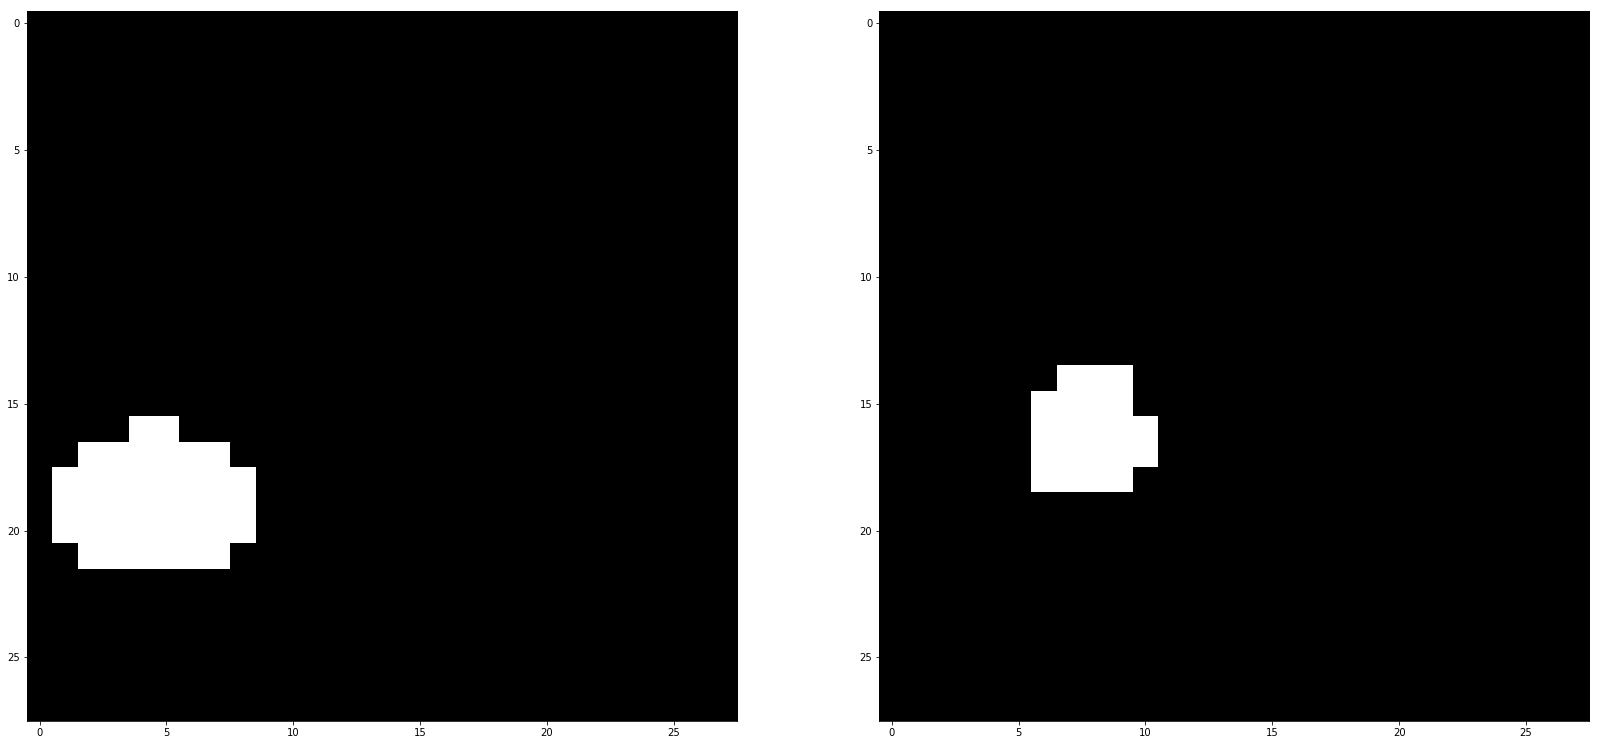

In [78]:
index = np.random.randint(vectors.shape[0])

image_sample = images[index].reshape(1,784)
prediction = model.predict(image_sample)
prediction = prediction.reshape(prediction.shape[1])
prediction_image = np.zeros((28,28))
for i in range(0, len(prediction), 4):
    prediction_image += generate(prediction[i], prediction[i+1], prediction[i+2], prediction[i+3])
print(prediction)
print(vectors[index])

# prediction_image[prediction_image > 0] = 1
# prediction_image[prediction_image <= 0] = 0

fig=plt.figure(figsize=(28, 28))
fig.add_subplot(1, 2, 1)
plt.imshow(image_sample.reshape((28,28)), cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(prediction_image, cmap='gray')

plt.show()